In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np


In [7]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [8]:
Nig_98_18_df = pd.read_csv('Nigeria_98_18.csv')

In [4]:
Nig_98_18_df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,1727903,566,NIG12876,12876,27 July 2018,2018,1,Battle-No change of territory,Military Forces of Nigeria (2015-),NaN,1,Boko Haram - Wilayat Gharb Ifriqiyyah,NaN,2,12,Western Africa,Nigeria,Borno,Dikwa,NaN,Dikwa,12.0240,13.9165,1,Vanguard (Lagos),National,27 July. Military forces repel a Boko Haram at...,0,1532965318,NGA
1,1727904,566,NIG12877,12877,27 July 2018,2018,1,Riots/Protests,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,Western Africa,Nigeria,Lagos,Epe,NaN,Epe,6.5833,3.9833,1,Vanguard (Lagos),National,27 July. Community advocates and campaigners i...,0,1532965318,NGA
2,1727905,566,NIG12878,12878,27 July 2018,2018,1,Violence against civilians,Unidentified Armed Group (Nigeria),NaN,3,Civilians (Nigeria),APC: All Progressives Congress,7,37,Western Africa,Nigeria,Imo,Ideato North,NaN,Akokwa,5.9088,7.1106,1,Nigeria Punch,National,27 July. Gunmen suspected to be assassins in t...,1,1532965318,NGA
3,1727901,566,NIG12874,12874,26 July 2018,2018,1,Battle-No change of territory,Military Forces of Nigeria (2015-),Police Forces of Nigeria (2015-),1,Boko Haram - Wilayat Gharb Ifriqiyyah,NaN,2,12,Western Africa,Nigeria,Borno,Bama,NaN,Jakana,11.6651,14.0410,1,Agence France Presse,International,26 July. Boko Haram raids a military base in J...,3,1532965318,NGA
4,1727902,566,NIG12875,12875,26 July 2018,2018,1,Riots/Protests,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,Western Africa,Nigeria,Rivers,Port Harcourt,NaN,Port Harcourt,4.7774,7.0134,1,The Sun (Nigeria),National,26 July. Rivers State youths protested alleged...,0,1532965318,NGA


In [6]:
len(Nig_98_18_df)

12444

In [9]:
Nig_98_18_df.groupby('interaction').count()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
interaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,28,28,28,28,28,28,28,28,28,4,28,0,0,28,28,28,28,28,0,28,28,28,28,28,28,28,28,28,28
11,51,51,51,51,51,51,51,51,51,0,51,51,0,51,51,51,51,51,0,51,51,51,51,51,51,51,51,51,51
12,996,996,996,996,996,996,996,996,996,113,996,996,2,996,996,996,996,996,1,996,996,996,996,996,996,996,996,996,996
13,1157,1157,1157,1157,1157,1157,1157,1157,1157,74,1157,1157,43,1157,1157,1157,1157,1157,0,1157,1157,1157,1157,1157,1157,1151,1157,1157,1157
14,191,191,191,191,191,191,191,191,191,16,191,191,12,191,191,191,191,191,0,191,191,191,191,191,191,191,191,191,191
15,318,318,318,318,318,318,318,318,318,113,318,318,11,318,318,318,318,318,0,318,318,318,318,318,318,318,318,318,318
16,175,175,175,175,175,175,175,175,175,76,175,175,14,175,175,175,175,175,0,175,175,175,175,175,175,175,175,175,175
17,326,326,326,326,326,326,326,326,326,23,326,326,76,326,326,326,326,326,0,326,326,326,326,326,326,323,326,326,326
18,4,4,4,4,4,4,4,4,4,1,4,4,0,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4


In [9]:
x_y_set = Nig_98_18_df[['notes', 'interaction']]

In [25]:
x_y_set['interaction'].iloc[1]

60

In [10]:
complete_entries = x_y_set[x_y_set['notes'].notnull()]

In [35]:
x_y_set_clean = x_y_set.dropna()

In [11]:
len(complete_entries)

12418

In [12]:
X_train, X_test, y_train, y_test = train_test_split(complete_entries['notes'], complete_entries['interaction'])
#creates a count vectorizer object
vect = CountVectorizer(stop_words='english').fit(X_train)
#vect = TfidfVectorizer(stop_words='english').fit(X_train)

#uses vect object to create a sparse matrix
X_train_vectorized = vect.transform(X_train)

In [71]:
def log_reg(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y)
    #creates a count vectorizer object
    vect = CountVectorizer(stop_words='english').fit(X_train)
    #vect = TfidfVectorizer(stop_words='english').fit(X_train)

    #uses vect object to create a sparse matrix
    X_train_vectorized = vect.transform(X_train)

    #creates and fits model
    model = LogisticRegression(solver = 'newton-cg' , multi_class='multinomial')
    model.fit(X_train_vectorized, y_train)



    predictions = model.predict(vect.transform(X_test))
    return accuracy_score(predictions, y_test)

In [85]:
model = LogisticRegression(multi_class='ovr')
penalty = ['l1', 'l2']
C = np.logspace(0,4,10)
hyperparameters = dict(C=C, penalty=penalty)
gridsearch = GridSearchCV(model, hyperparameters, cv=5, verbose=1)

In [86]:
best_model = gridsearch.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.9min finished


In [87]:
predictions = best_model.predict(vect.transform(X_test))
accuracy_score(predictions, y_test)

0.75523349436392917

In [72]:
log_reg(complete_entries['notes'], complete_entries['interaction'])

0.75974235104669885

In [89]:
from sklearn.decomposition import TruncatedSVD

In [98]:
tsvd = TruncatedSVD(n_components=1000)
features_spares_tsvd = tsvd.fit(X_train_vectorized).transform(X_train_vectorized)

In [99]:
features_spares_tsvd.shape

(9313, 1000)

In [92]:
X_train_vectorized.shape

(9313, 12335)

In [100]:
model.fit(features_spares_tsvd, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
predictions = model.predict(tsvd.fit(vect.transform(X_test)).transform(vect.transform(X_test)))
accuracy_score(y_test, predictions)

0.29629629629629628

In [76]:
from sklearn.linear_model import RidgeClassifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_vectorized, y_train)
predictions = ridge_model.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)

0.70466988727858293

In [77]:
from sklearn.svm import LinearSVC
svc_mod = LinearSVC()
svc_mod.fit(X_train_vectorized, y_train)
predictions = svc_mod.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)

0.7407407407407407

In [12]:
X_train, X_test, y_train, y_test = train_test_split(complete_entries['notes'], complete_entries['interaction'])
#creates a count vectorizer object
vect = CountVectorizer(stop_words='english').fit(X_train)
#vect = TfidfVectorizer(stop_words='english').fit(X_train)

#uses vect object to create a sparse matrix
X_train_vectorized = vect.transform(X_train)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)

0.70048309178743962

In [9]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)

0.57648953301127215

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)

0.70016103059581325

In [15]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)

0.75942028985507248

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, predictions)

array([[  4,   0,   0,   2,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   5,   0,   7,   2,   1,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   1,   0,   0],
       [  0,   0, 204,  24,   1,   2,   1,   1,   1,   0,   0,  10,   0,
          0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  1,   0,  20, 179,   7,   2,   0,   0,   0,   0,   0,   1,   0,
          2,   2,   1,   0,   0,  43,   0,   0,   0,   1,   0,   0,   1,
          0,   0,   1,   0,   0],
       [  0,   0,   1,   6,  19,   3,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   2,   6,   0,   0,   1,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  28,  11,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

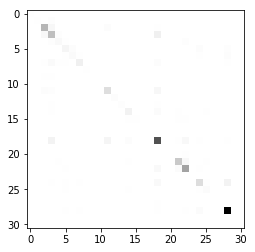

In [19]:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, predictions)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [20]:
from sklearn.metrics import classification_report

In [22]:
classification_report(y_test, predictions)

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n         10       0.80      0.57      0.67         7\n         11       0.83      0.26      0.40        19\n         12       0.83      0.82      0.83       248\n         13       0.61      0.69      0.64       261\n         14       0.46      0.47      0.47        40\n         15       0.45      0.42      0.44        66\n         16       0.47      0.38      0.42        42\n         17       0.69      0.48      0.57        91\n         20       0.71      0.50      0.59        10\n         23       0.50      0.15      0.24        13\n         24       1.00      0.20      0.33         5\n         27       0.66      0.69      0.67       133\n         28       1.00      1.00      1.00         9\n         30       0.67      0.40      0.50        20\n         33       0.55      0.51      0.53        70\n         34       0.40      0.20      0.27        20\n         35       0.00      0.00      0.00         1\n         36       0.00   

In [1]:
import autokeras as ak

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
?? ak.preprocessor

In [35]:
clf = Classifier(())

TypeError: Can't instantiate abstract class Classifier with abstract methods evaluate, fit, predict

In [38]:
from autokeras.search import ModelTrainer

In [39]:
clf = ModelTrainer()

TypeError: __init__() missing 4 required positional arguments: 'model', 'train_data', 'test_data', and 'verbose'